# Lecture 2) Lineare & Linearisierbare Modelle - Teil 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

Wir brauchen wie letztes Mal einen Datensatz. 
Wir verwenden dafür erstmal ein synthetisches Beispiel...  

Zwischen X und y besteht ein (leicht durch Rauschen gestörter) polynomialer Zusammenhang vom Grad 3:

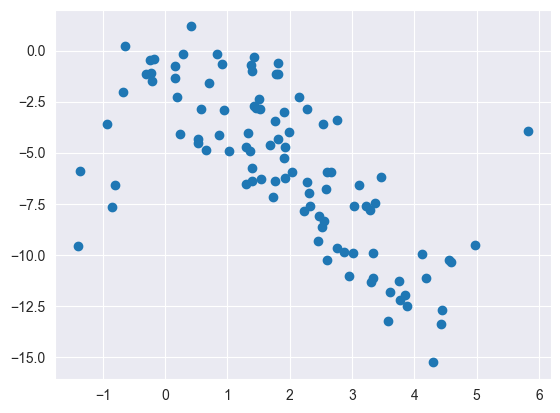

In [53]:
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 0.5, 100)
y = X - 2 * (X ** 2) + 0.3 * (X ** 3) + np.random.normal(-2, 2, 100)

plt.plot(X,y,'o');


...was würden wir mit unseren Methoden feststellen?

Suche nach der Stärke des linearen Zusammenhanges...

In [55]:
np.corrcoef(X,y)

array([[ 1.        , -0.67685471],
       [-0.67685471,  1.        ]])

###### eine Korrelation von 0.6 weist auf einen moderaten linearen Zusammenhang hin.

...weiter:

In [4]:
np.corrcoef(X**2,y)

array([[ 1.        , -0.69278937],
       [-0.69278937,  1.        ]])

In [5]:
np.corrcoef(X**3,y)

array([[ 1.        , -0.57362894],
       [-0.57362894,  1.        ]])

Versuchen wir es mit dem univariaten Polynommodell.

## 2.1) Das univariate Polynommodell

Wenn wir ein univariates Polynommodell anpassen wollen, dann haben wir die Modellstruktur:
    
$f(X)=b_0+b_1X+b_2X^2+\cdot + b_mX^m$


unsere Datenmatrix $X$ muß also für n Datenpunkte $x_1,\ldots,x_n$ die Form


$$
X=\begin{pmatrix} 
1 & x_1 & \ldots & x_1^m\\
 1 & x_2 & \ldots & x_2^m\\
 \vdots & \vdots & \ddots & \vdots \\
 1 & x_n & \ldots & x_n^m\\
\end{pmatrix}
$$

haben.

Wir brauchen zusätzlicher Spalten in unserer Feature-Matrix, die die potenzierte Größe 'bmi' enthalten.  

Das könnten wir "per Hand" machen oder wir benutzen die "Polynomial Features" aus ScikitLearn...

## Die Polynomial Features sind eine Transformations-Methode für Daten.  
Wie bei den bekannten Scalern erwartet die Funktion zuerst die Spezifikation der Trafo.  
In diesem Fall eine Info, bis zu welchem Grad solche Features erzeugt werden sollen

    polynomial_features= PolynomialFeatures(degree=20)
    
Ist die Spezifikation erfolgt, dann werden die Daten übergeben und die Trafo durchgeführt.  
In unserem Fall hier werden Spalten mit den potenzierten Einflußgrößen erzeugt und zusammengefügt.  

$\underline{Achtung:}$ Die Trafo startet mit $X^0=1$. Die 1er-Spalte wird also diesmal automatisch erzeugt und wir müssen nicht mehr extra aktiv werden...

In [6]:
# Import Polynomial Features

from sklearn.preprocessing import PolynomialFeatures

#degree = 100

polynomial_features= PolynomialFeatures(degree=100)

#generate numpy array with suitable shape
X=np.array(X).reshape(-1,1)

#append polxynomial features to array
X_poly = polynomial_features.fit_transform(X)

print(X_poly.shape)

(100, 101)


Text(0.5, 1.0, '1st Polynomial Feature')

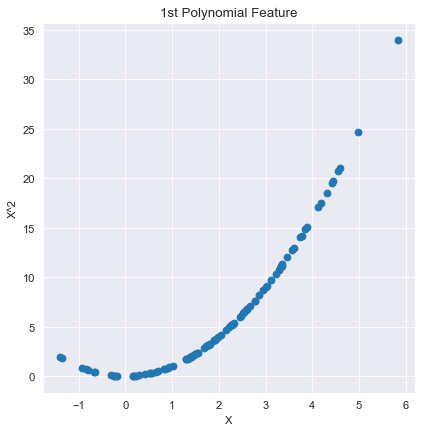

In [56]:
# Plot size
plt.figure(figsize=(6, 6), dpi=80)

plt.plot(X_poly[:,1],X_poly[:,2],'o')

plt.xlabel('X')
plt.ylabel('X^2')
plt.title('1st Polynomial Feature')


In [8]:
# Split the data into training and testing sets (by default, 80% train and 20% test)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.20)

### 2.1.1) Ein univariates Polynommodell

Das Anpassen des (linearisierten) Modelles geht mit OLS wie gehabt ganz einfach...
Wir nehmen zunächst die lineare Einfachregression:

In [9]:
# Model Fit - Train

olsmod_LinReg_Poly1 = sm.OLS(y_train, X_train_poly[:,0:2]) # definition of model f(x)=b0+b1x
olsres_LinReg_Poly1 = olsmod_LinReg_Poly1.fit() # parameter estimation on Train set - model name olsres_LinReg

# Get the summary of the model
olsres_LinReg_Poly1_summary = olsres_LinReg_Poly1.summary()
print(olsres_LinReg_Poly1_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     58.23
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           4.86e-11
Time:                        08:56:09   Log-Likelihood:                -200.46
No. Observations:                  80   AIC:                             404.9
Df Residuals:                      78   BIC:                             409.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6377      0.547     -4.822      0.0

jetzt kann man die Prognosen berechnen lassen. Dazu gibts ja die Methode 
    
    model.predict()

In [10]:
y_hat_Poly1_tr = olsres_LinReg_Poly1.predict(X_train_poly[:,0:2]) # predictions on training set
y_hat_Poly1_te = olsres_LinReg_Poly1.predict(X_test_poly[:,0:2]) # predictions on test set

Wie gut paßt das Modell?

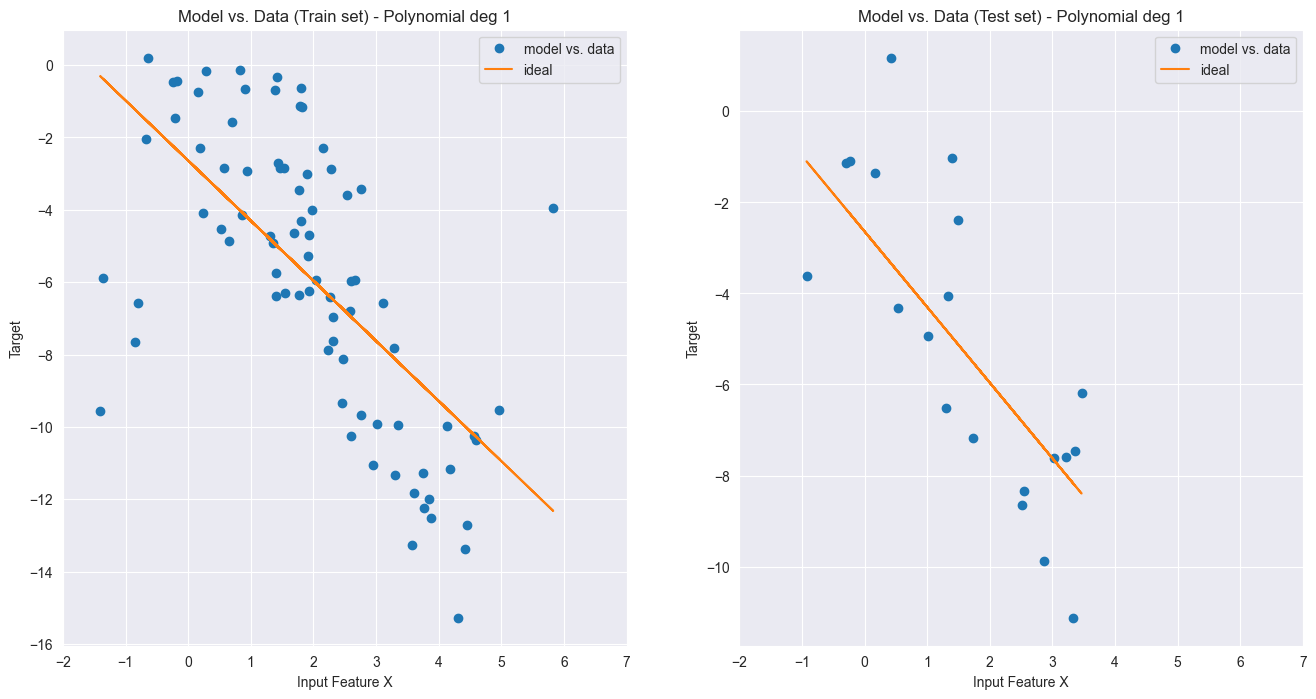

In [11]:
# Generate the data points
xFunc = np.linspace(-3, 8, 200)

# Plot size

plt.figure(figsize=(16, 8))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)

plt.plot(X_train_poly[:,1], y_train, 'o', label='model vs. data');
plt.plot(X_train_poly[:,1],y_hat_Poly1_tr, '-', label='ideal');


plt.xlim(-2,7)  # Set the x-axis limits 
#plt.ylim(0, 30)  # Set the y-axis limits 

plt.xlabel('Input Feature X')
plt.ylabel('Target') 
plt.title('Model vs. Data (Train set) - Polynomial deg 1')
#position of labels
plt.legend(); 

plt.subplot(1, 2, 2)

plt.plot(X_test_poly[:,1], y_test, 'o', label='model vs. data');
plt.plot(X_test_poly[:,1],y_hat_Poly1_te, '-', label='ideal');


plt.xlim(-2,7)  # Set the x-axis limits 
#plt.ylim(0, 30)  # Set the y-axis limits 

plt.xlabel('Input Feature X')
plt.ylabel('Target') 
plt.title('Model vs. Data (Test set) - Polynomial deg 1')
#position of labels
plt.legend(); 


In [12]:
# Model Fit - Train

olsmod_LinReg_Poly3 = sm.OLS(y_train, X_train_poly[:,0:4]) # definition of model f(x)=b0+b1x+b2x^2+b3x^3
olsres_LinReg_Poly3 = olsmod_LinReg_Poly3.fit() # parameter estimation on Train set - model name olsres_LinReg

# Get the summary of the model
olsres_LinReg_Poly3_summary = olsres_LinReg_Poly3.summary()
print(olsres_LinReg_Poly3_summary)

y_hat_Poly3_tr = olsres_LinReg_Poly3.predict(X_train_poly[:,0:4]) # predictions on training set
y_hat_Poly3_te = olsres_LinReg_Poly3.predict(X_test_poly[:,0:4]) # predictions on test set

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     68.89
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.27e-21
Time:                        08:56:09   Log-Likelihood:                -170.23
No. Observations:                  80   AIC:                             348.5
Df Residuals:                      76   BIC:                             358.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4911      0.438     -3.404      0.0

In [13]:
# Define the Polynomial Function
# Extract the coefficients from the fitted model
coefficients3 = olsres_LinReg_Poly3.params

# Define a function to calculate the polynomial value
def polynomial_function3(x):
    # Extract individual coefficients
    b0 = coefficients3[0]
    b1 = coefficients3[1]
    b2 = coefficients3[2]
    b3 = coefficients3[3]
    
    # Calculate the polynomial value using the coefficients
    y = b0 + b1 * x + b2 * x**2 + b3 * x**3
    
    return y

In [14]:
# Model Fit - Train

olsmod_LinReg_Poly9 = sm.OLS(y_train, X_train_poly[:,0:10]) # definition of model f(x)=b0+b1x+...+b9x^9
olsres_LinReg_Poly9 = olsmod_LinReg_Poly9.fit() # parameter estimation on Train set - model name olsres_LinReg

# Get the summary of the model
olsres_LinReg_Poly9_summary = olsres_LinReg_Poly9.summary()
print(olsres_LinReg_Poly9_summary)

y_hat_Poly9_tr = olsres_LinReg_Poly9.predict(X_train_poly[:,0:10]) # predictions on training set
y_hat_Poly9_te = olsres_LinReg_Poly9.predict(X_test_poly[:,0:10]) # predictions on test set

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     25.36
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.02e-18
Time:                        08:56:09   Log-Likelihood:                -164.80
No. Observations:                  80   AIC:                             349.6
Df Residuals:                      70   BIC:                             373.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0403      0.789     -1.318      0.1

In [15]:
# Define the Polynomial Function
# Extract the coefficients from the fitted model
coefficients9 = olsres_LinReg_Poly9.params

# Define a function to calculate the polynomial value
def polynomial_function9(x):
    # Extract individual coefficients
    b0 = coefficients9[0]
    b1 = coefficients9[1]
    b2 = coefficients9[2]
    b3 = coefficients9[3]
    b4 = coefficients9[4]
    b5 = coefficients9[5]
    b6 = coefficients9[6]
    b7 = coefficients9[7]
    b8 = coefficients9[8]
    b9 = coefficients9[9]
    
    # Calculate the polynomial value using the coefficients
    y = b0+b1*x + b2*x**2 + b3*x**3 + b4*x**4 + b5*x**5 + b6*x**6 + b7*x**7 + b8*x**8 + b9*x**9
    
    return y

In [16]:
# Model Fit - Train
degPoly_max=20

olsmod_LinReg_Poly20 = sm.OLS(y_train,X_train_poly[:,0:degPoly_max+1]) # definition of model f(x)=b0+b1x+...+b90x^90
olsres_LinReg_Poly20 = olsmod_LinReg_Poly20.fit() # parameter estimation on Train set - model name olsres_LinReg

# Get the summary of the model
olsres_LinReg_Poly20_summary = olsres_LinReg_Poly20.summary()
#print(olsres_LinReg_Poly90_summary)

y_hat_Poly20_tr = olsres_LinReg_Poly20.predict(X_train_poly[:,0:degPoly_max+1]) # predictions on training set
y_hat_Poly20_te = olsres_LinReg_Poly20.predict(X_test_poly[:,0:degPoly_max+1]) # predictions on test set

In [17]:
# Define the polynomial function
def polynomial_function20(x, coefficients):
    degree = len(coefficients) - 1  # Determine the degree based on the number of coefficients
    y = sum(coeff * x ** i for i, coeff in enumerate(coefficients))
    return y

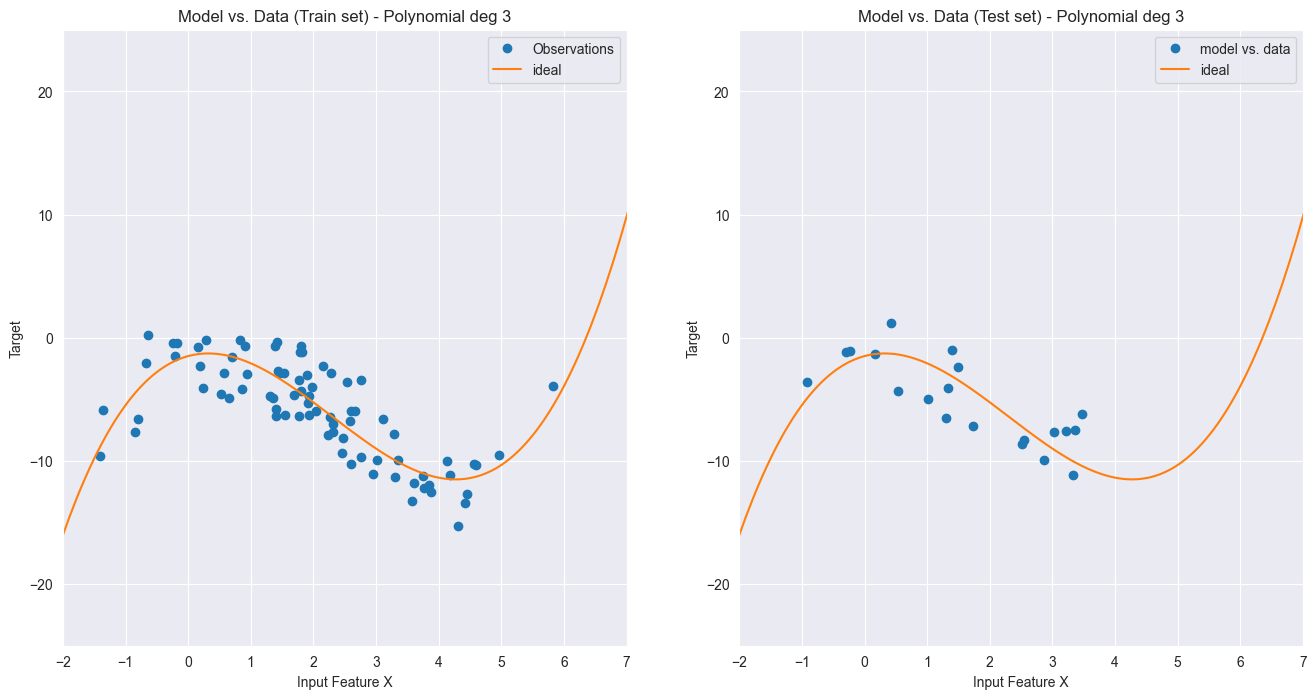

In [18]:
# Generate the data points
xFunc = np.linspace(-3, 8, 200)

# Plot size

plt.figure(figsize=(16, 8))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)

plt.plot(X_train_poly[:,1], y_train, 'o', label='Observations');
plt.plot(xFunc,polynomial_function3(xFunc), '-', label='ideal');


plt.xlim(-2,7)  # Set the x-axis limits 
plt.ylim(-25, 25)  # Set the y-axis limits 

plt.xlabel('Input Feature X')
plt.ylabel('Target') 
plt.title('Model vs. Data (Train set) - Polynomial deg 3')
#position of labels
plt.legend(); 

plt.subplot(1, 2, 2)

plt.plot(X_test_poly[:,1], y_test, 'o', label='model vs. data');
plt.plot(xFunc,polynomial_function3(xFunc), '-', label='ideal');


plt.xlim(-2,7)  # Set the x-axis limits 
plt.ylim(-25, 25)  # Set the y-axis limits 

plt.xlabel('Input Feature X')
plt.ylabel('Target') 
plt.title('Model vs. Data (Test set) - Polynomial deg 3')
#position of labels
plt.legend(); 


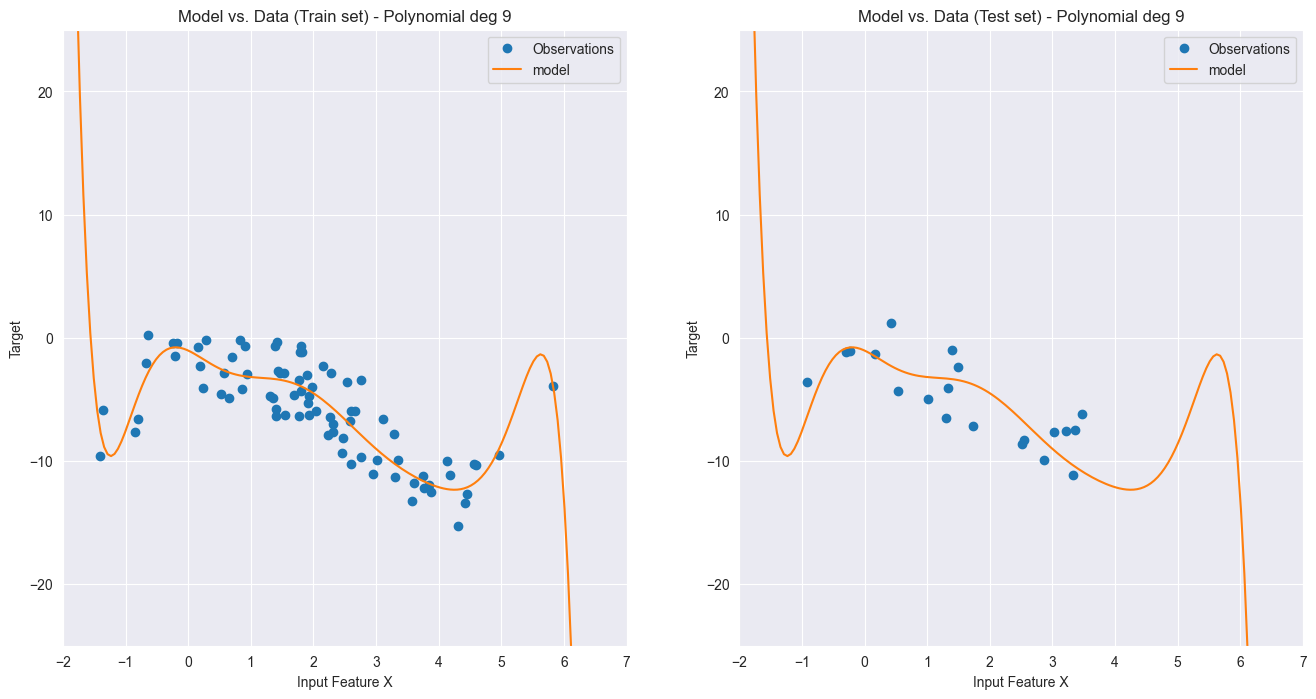

In [19]:
# Generate the data points
xFunc = np.linspace(-3, 8, 200)

# Plot size

plt.figure(figsize=(16, 8))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)

plt.plot(X_train_poly[:,1], y_train, 'o', label='Observations');
plt.plot(xFunc,polynomial_function9(xFunc), '-', label='model');


plt.xlim(-2,7)  # Set the x-axis limits 
plt.ylim(-25, 25)  # Set the y-axis limits  

plt.xlabel('Input Feature X')
plt.ylabel('Target') 
plt.title('Model vs. Data (Train set) - Polynomial deg 9')
#position of labels
plt.legend(); 

plt.subplot(1, 2, 2)

plt.plot(X_test_poly[:,1], y_test, 'o', label='Observations');
plt.plot(xFunc,polynomial_function9(xFunc), '-', label='model');


plt.xlim(-2,7)  # Set the x-axis limits 
plt.ylim(-25, 25)  # Set the y-axis limits  

plt.xlabel('Input Feature X')
plt.ylabel('Target') 
plt.title('Model vs. Data (Test set) - Polynomial deg 9')
#position of labels
plt.legend(); 


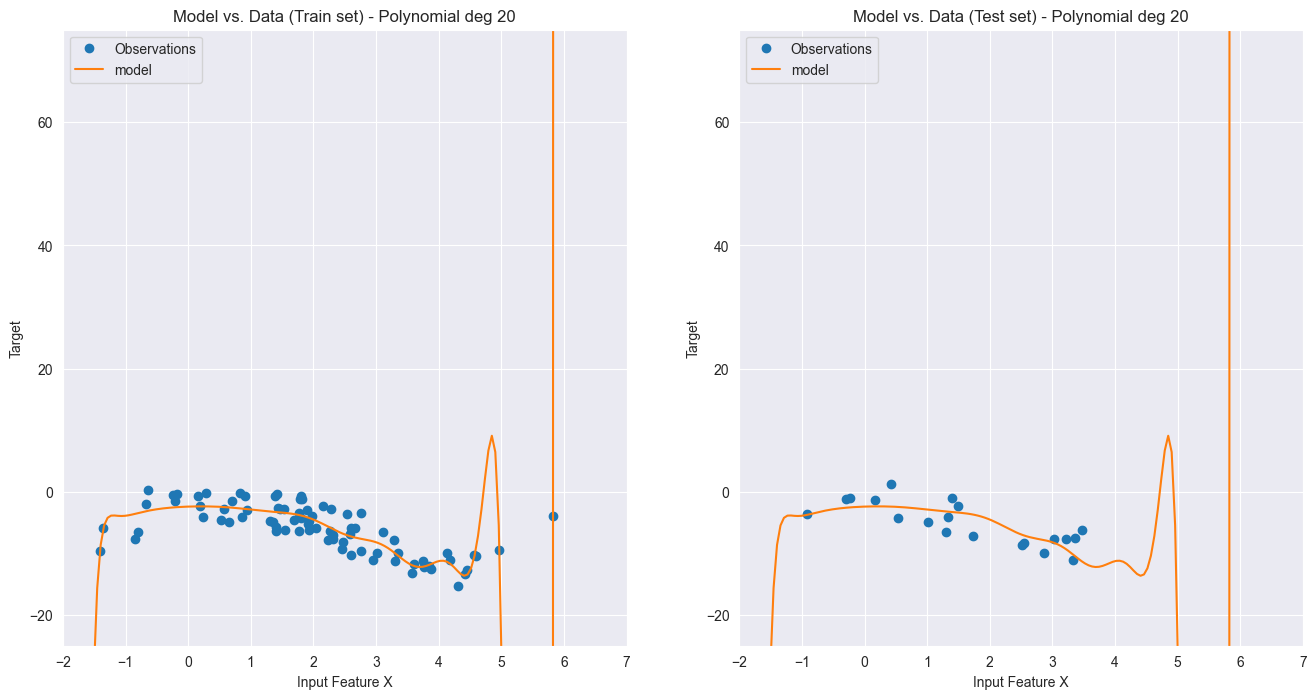

In [20]:
# Generate the data points
xFunc = np.linspace(-3, 8, 200)

# Extract the coefficients from the fitted model
coefficients20 = olsres_LinReg_Poly20.params

# Plot size

plt.figure(figsize=(16, 8))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)

plt.plot(X_train_poly[:,1], y_train, 'o', label='Observations');
plt.plot(xFunc,polynomial_function20(xFunc,coefficients20), '-', label='model');


plt.xlim(-2,7)  # Set the x-axis limits 
plt.ylim(-25, 75)  # Set the y-axis limits  

plt.xlabel('Input Feature X')
plt.ylabel('Target') 
plt.title('Model vs. Data (Train set) - Polynomial deg 20')
#position of labels
plt.legend(); 

plt.subplot(1, 2, 2)

plt.plot(X_test_poly[:,1], y_test, 'o', label='Observations');
plt.plot(xFunc,polynomial_function20(xFunc,coefficients20), '-', label='model');


plt.xlim(-2,7)  # Set the x-axis limits 
plt.ylim(-25, 75)  # Set the y-axis limits  

plt.xlabel('Input Feature X')
plt.ylabel('Target') 
plt.title('Model vs. Data (Test set) - Polynomial deg 20')
#position of labels
plt.legend(); 


### Aufgabe 1) Polynommodell (univariat)

Wir haben gesehen, daß mit steigender Komplexität des Modelles (das heißt hier wachsendem Polynomgrad) das Modell zwar teilweise besser auf der Trainingsmenge wird, aber irgendwann schlechter beim Generalisieren auf ungesehene Daten. Zumindest so lange, bis derr Lösungsalgorithmus Probleme beim stabilen Fitten der Parameter bekommt.


- Berechnen Sie den RMSE auf der Trainings- und Testmenge für Polynomgrade von 0 bis 50.

Hinweis:  

    - Legen Sie Polynomiale Features bis zu Grad 50 in den Daten an. 
    - Teilen Sie den Datensatz in 80% Training und 20% Test
    - Variieren Sie in einer Schleife den Grad des Polynoms (= Anzahl der Spalten in der Feature Matrix die OLS benutzt)
    - Lassen Sie sich RMSE und Pearson Korrelation für Trainings- und Testmenge in eine Liste schreiben
    
- Zeichnen Sie Trainings- und Testfehler in Abhängigkeit vom steigenden Polynomgrad
- Interpretieren Sie das Ergebnis: welche Komplexität wäre optimal?


In [ ]:
for degree in range(50):
    pass # TODO: Figure out if this still needs to be done or if it has been done below

### ...und wie sieht das Ganze auf echten Daten aus?

wir nehmen nochmal den Datensatz zur Diabetes-Erkrankung.

In [21]:
from sklearn.datasets import load_diabetes


# Load the Diabetes dataset
diabetes = load_diabetes()

# The dataset is stored as a dictionary-like object with various attributes
# You can access the data, target, feature names, and other information from the dictionary
data = diabetes.data  # Features
target = diabetes.target  # Target (diabetes progression)
feature_names = diabetes.feature_names  # Feature names

# Create a Pandas DataFrame to work with the data more easily (optional)
diabetes_df = pd.DataFrame(data, columns=feature_names)
diabetes_df['Target'] = target  # Adding the target column

# Display the first few rows of the DataFrame with the Input Features
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Mit Hilfe einer Heatmap hatten wir letztes Mal schon festgestellt, daß die erklärende Variable mit dem größten (linearen) Zusammenhang zum Target der BMI ist:

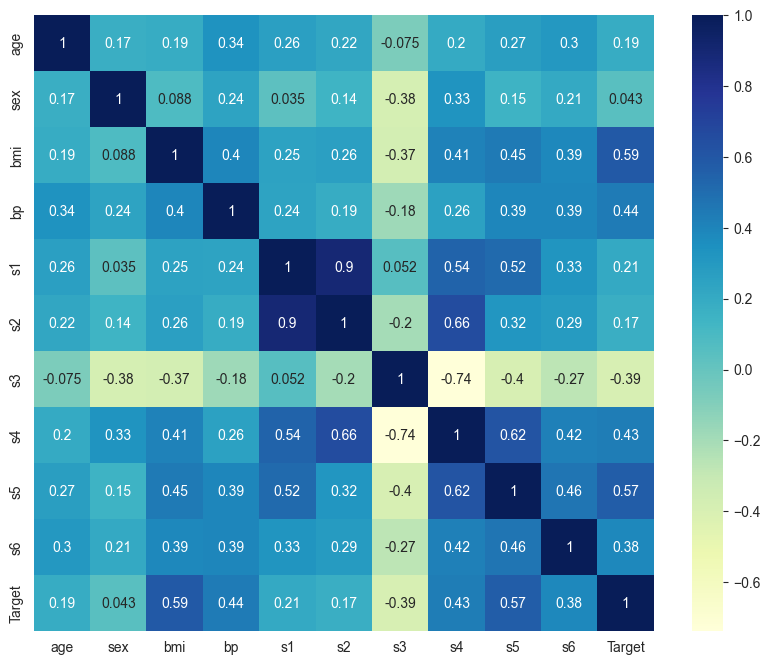

In [22]:
# Plot the correlation-Heatmap
fig = plt.figure(figsize=(10, 8));
sns.heatmap(diabetes_df.corr(), cmap="YlGnBu", annot=True)
  
plt.show()

Mit einem Modell der linearen Einfachregression ist man beim letzten Mal auf der Testmenge auf einen RMSE von ungefähr 50 - 60 gekommen.

$\textbf{Frage:}$ Wird es besser, wenn man den bmi auch nichtlinear ins Modell eingehen läßt?

Stichwort: univariates Polynommodell!

In [23]:
from sklearn.model_selection import train_test_split

# Assuming you have a single DataFrame 'df' with features and target
X = diabetes_df['bmi']  # Features = bmi
y = diabetes_df['Target']  # Target variable


Wenn wir ein univariates Polynommodell anpassen wollen, dann haben wir die Modellstruktur:
    
$f(X)=b_0+b_1X+b_2X^2+\cdot + b_mX^m$


unsere Datenmatrix $X$ muß also für n Datenpunkte $x_1,\ldots,x_n$ die Form


$$
X=\begin{pmatrix} 
1 & x_1 & \ldots & x_1^m\\
 1 & x_2 & \ldots & x_2^m\\
 \vdots & \vdots & \ddots & \vdots \\
 1 & x_n & \ldots & x_n^m\\
\end{pmatrix}
$$

haben.

Wir brauchen zusätzlicher Spalten in unserer Feature-Matrix, die die potenzierte Größe 'bmi' enthalten.  

Das könnten wir "per Hand" machen oder wir benutzen die "Polynomial Features" aus ScikitLearn...

In [24]:
# polynomial features

from sklearn.preprocessing import PolynomialFeatures

#degree of polynomial 

polynomial_features= PolynomialFeatures(degree=50)

#generate numpy array
X_bmi=np.array(X).reshape(-1,1)

#append polynomial features
X_bmi_poly = polynomial_features.fit_transform(X_bmi)

print(X_bmi_poly.shape)

(442, 51)


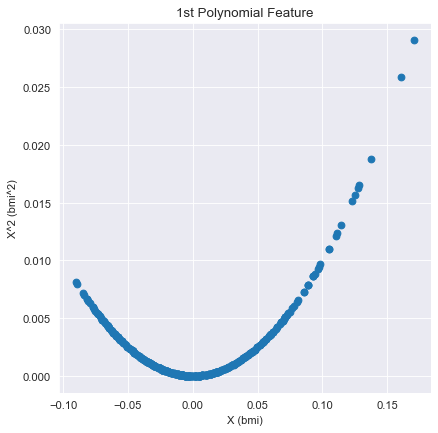

In [25]:
# Plot size
plt.figure(figsize=(6, 6), dpi=80)

plt.plot(X_bmi_poly[:,1],X_bmi_poly[:,2],'o')

plt.xlabel('X (bmi)');
plt.ylabel('X^2 (bmi^2)');
plt.title('1st Polynomial Feature');


Jetzt müssen wir noch die Daten in Test- und Trainingsdatensatz aufteilen:

In [26]:
# Split the data into training and testing sets (by default, 80% train and 20% test)
X_train_bmi_poly, X_test_bmi_poly, y_train, y_test = train_test_split(X_bmi_poly, y, test_size=0.20)

In [27]:
np.shape(X_test_bmi_poly)

(89, 51)

### 2.1.2) Univariates Polynommodell - Diabetes Daten

Das Anpassen des (linearisierten) Modelles geht mit OLS wie gehabt ganz einfach...

In [28]:
# Model Fit - Train

olsmod_LinRegPoly = sm.OLS(y_train, X_train_bmi_poly) # definition of model
olsres_LinRegPoly = olsmod_LinRegPoly.fit() # parameter estimation on Train set - model name olsres_LinReg

# Get the summary of the model
olsres_LinRegPoly_summary = olsres_LinRegPoly.summary()
print(olsres_LinRegPoly_summary)

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     16.26
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.18e-25
Time:                        08:56:11   Log-Likelihood:                -1959.9
No. Observations:                 353   AIC:                             3944.
Df Residuals:                     341   BIC:                             3990.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        160.7869      7.329     21.940      0.0

ist doch ein wenig besser als die Einfachregression, in der der 'bmi' nur linear eingeht...
Vergleich zu vorher:
    
R-squared:                       0.296
Adj. R-squared:                  0.294

In [29]:
y_hat_Poly_tr = olsres_LinRegPoly.predict(X_train_bmi_poly) # predictions on training set
y_hat_Poly_te = olsres_LinRegPoly.predict(X_test_bmi_poly) # predictions on test set

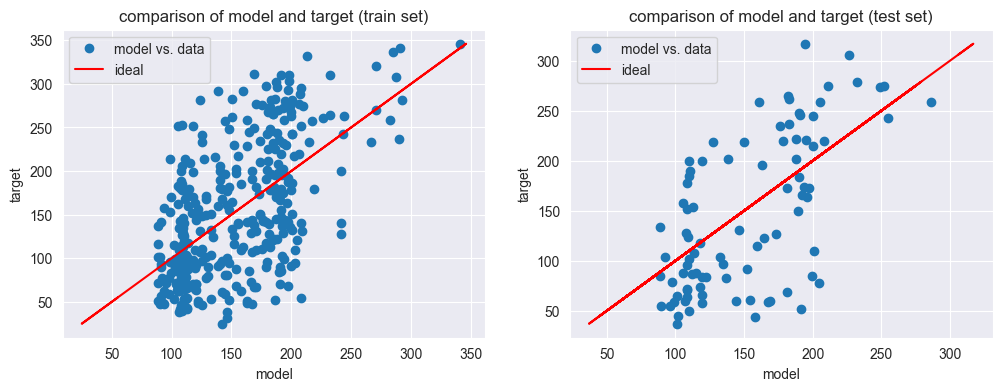

In [30]:
# Plot size

plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)

plt.plot(y_hat_Poly_tr, y_train, 'o', label='model vs. data');
plt.plot(y_train,y_train, 'r', label='ideal');
plt.xlabel('model')
plt.ylabel('target') 
plt.title('comparison of model and target (train set)')
#position of labels
plt.legend(); 

plt.subplot(1, 2, 2)

plt.plot(y_hat_Poly_te, y_test, 'o', label='model vs. data');
plt.plot(y_test,y_test, 'r', label='ideal');
plt.xlabel('model')
plt.ylabel('target') 
plt.title('comparison of model and target (test set)')
#position of labels
plt.legend(); 





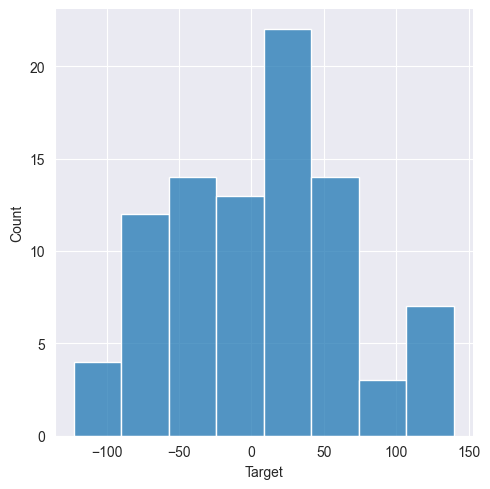

In [31]:
sns.displot(y_hat_Poly_te - y_test); #Histogram of residuals

### 2.1.3) Feature Selection

### Auf Basis des Model-Summary können wir versuchen begründet zu entscheiden, welche Variablen ins Modell rein sollen...

Das macht vermutlich mehr Sinn!

In [32]:
olsres_LinRegPoly_summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,160.7869,7.329,21.940,0.000,146.372,175.202
x1,1592.6686,479.395,3.322,0.001,649.726,2535.611
x2,-2.12e+04,2.36e+04,-0.899,0.369,-6.76e+04,2.52e+04
x3,-4.443e+05,6.11e+05,-0.727,0.468,-1.65e+06,7.58e+05
x4,1.424e+07,1.92e+07,0.743,0.458,-2.34e+07,5.19e+07
x5,4.279e+07,2.39e+08,0.179,0.858,-4.27e+08,5.13e+08
x6,-3.921e+09,6.07e+09,-0.646,0.519,-1.59e+10,8.02e+09
x7,1.525e+10,3.99e+10,0.382,0.702,-6.32e+10,9.37e+10
x8,4.471e+11,8.18e+11,0.547,0.585,-1.16e+12,2.06e+12
x9,-3.407e+12,4.91e+12,-0.694,0.488,-1.31e+13,6.25e+12


In [33]:
# Extract feature names from the summary
feature_names = olsres_LinRegPoly_summary.tables[1]

feature_names;
# Print the feature names
#print("Feature Names:", feature_names)

In [34]:
# Extract only the variable names and their corresponding p-values
variable_names_and_pvalues = [(row[0], row[4]) for row in feature_names.data[1:]];

# Print the variable names and their p-values
#for name, p_value in variable_names_and_pvalues:
#    print(f"Variable Name: {name}, P-value: {p_value}")
    
# Create a list of tuples with variable names and p-values
variable_list = [[name, p_value] for name, p_value in variable_names_and_pvalues];

# Print the variable list

# print(np.array(variable_list))


### Aufgabe 2) Feature Selection

Wir haben zwei verschiedene Methoden kennengelernt um auszuwählen, welche Features ins Modell rein sollen:

    - Forward Selection - das Modell wird sukzessive erweitert
    - Backward Selection - das Modell wird schrittweise vereinfacht
    
Versuchen Sie anhand der p-Werte und der erzielten Performance-Kriterien ein optimales Setup für das Polynommodell zu finden.

Welche Verbesserung erzielt man durch die sinnvolle Auswahl im Vergleich zum Modell vom Grad 

## 2.2) Ein multivariates lineares Modell

In [35]:
# Assuming you have a single DataFrame 'df' with features and target
X_mult = diabetes_df.drop('Target',axis=1)  # drop target
y = diabetes_df['Target']  # Target variable

In [36]:
X_mult.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


im einfachsten Fall verwenden wir alles, was wir haben :-) und schauen mal...

In [37]:
# Split the data into training and testing sets (by default, 80% train and 20% test)
X_train_mult1, X_test_mult1, y_train, y_test = train_test_split(X_mult, y, test_size=0.20)

In [38]:
# add first column with 1

X_train_mult = sm.add_constant(X_train_mult1) # 1er Spalte vorne anhängen
X_test_mult = sm.add_constant(X_test_mult1) # 1er Spalte vorne anhängen

X_train_mult.head()

,const,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
289,1.0,-0.074533,0.050680,0.055229,-0.040099,0.053469,0.053174,-0.043401,0.071210,0.061238,-0.034215
104,1.0,-0.027310,-0.044642,0.064930,-0.002228,-0.024960,-0.017284,0.022869,-0.039493,-0.061176,-0.063209
65,1.0,-0.045472,0.050680,-0.024529,0.059744,0.005311,0.014970,-0.054446,0.071210,0.042341,0.015491
161,1.0,-0.045472,0.050680,0.063852,0.070072,0.133274,0.131461,-0.039719,0.108111,0.075741,0.085907
349,1.0,0.001751,0.050680,-0.057941,-0.043542,-0.096510,-0.047034,-0.098625,0.034309,-0.061176,-0.071494


In [39]:
# Model Fit - Train

olsmod_mult = sm.OLS(y_train, X_train_mult) # definition of model
olsres_mult = olsmod_mult.fit() # parameter estimation on Train set - model name olsres_mult

# Get the summary of the model
olsres_mult_summary = olsres_mult.summary()
print(olsres_mult_summary)

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     36.64
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           2.32e-48
Time:                        08:56:12   Log-Likelihood:                -1901.1
No. Observations:                 353   AIC:                             3824.
Df Residuals:                     342   BIC:                             3867.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1963      2.859     53.241      0.0

In [40]:
y_hat_mult_tr = olsres_mult.predict(X_train_mult) # predictions on training set
y_hat_mult_te = olsres_mult.predict(X_test_mult) # predictions on test set

print('train rho',np.corrcoef(y_train,y_hat_mult_tr))
print('test rho',np.corrcoef(y_test,y_hat_mult_te))

train rho [[1.         0.71916832]
 [0.71916832 1.        ]]
test rho [[1.        0.7121223]
 [0.7121223 1.       ]]


### Aufgabe 3) Multivariates Modell

Wir haben im multivariaten Fall ziemlich viel Auswahl, wie das Modell aussehen kann. Das macht es schwierig ein Top-Modell zu identifizieren.  

    
- Versuchen Sie anhand der p-Werte und der erzielten Performance-Kriterien ein optimales Setup für das multivariate Modell zu finden. Also: entscheiden Sie, welche Variablen rein sollen und welche nicht.
- Nutzen Sie dazu alle Möglichkeiten (z.B. auch eine Schleife über die Input Features etc.)
- bringt es was, wenn man für die relevanten Größen auch noch polynomilae Features erlaubt?
- Was ist das Top-Modell, das Sie zustande bekommen?
- Diskutieren Sie, wieviel der ganze Aufwand bringt, d.h.: Ist es die Mühe wert? :-)